Refactored

In [19]:
import pandas as pd
import pandas_ta as ta
from tqdm import tqdm
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
from backtesting import Strategy
from backtesting import Backtest
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


tqdm.pandas()

tradingData = pd.read_csv("../data/^ixic-6mo-1h.csv")
tradingData.Datetime = pd.to_datetime(tradingData.Datetime, utc=True)
tradingData=tradingData[tradingData.High != tradingData.Low]
tradingData.set_index('Datetime', inplace=True)
tradingData.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
tradingData

Open          High           Low  \
Datetime                                                              
2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
...                                 ...           ...           ...   
2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

                                  Close  
Datetime                                 
2023-10-18 13:30:00+00:00  13451.814453  
2023-10-18 14:30:00+00:00  13415.507812  
2023-10-18 15:30:00+00:00  13398.106445  
2023-10-18 16:30:00+00:00  13418.132812  
2023-10-18 17:30:00+00:00  13379.012695  
...                                 ...  
2024-04-17 15:30:00+00:00  15715.237305  
2024-04-17 16:30:00+00:00  15741.280273  
2024-04-17 17:30:00+00:00  15748.874023  
2024-04-17 18:30:00+00:00  15689.807617  
2024-04-17 19:30:00+00:00  15683.372070  

[871 rows x 4 columns]

In [20]:
tradingData['EMA'] = ta.ema(tradingData.Close, length=400)
macd = ta.macd(tradingData.Close)
macd

tradingData['MACD'] = macd.loc[:, 'MACD_12_26_9']
tradingData['MACD_signal'] = macd.loc[:, 'MACDs_12_26_9']
tradingData['MACD_histogram'] = macd.loc[:, 'MACDh_12_26_9']
tradingData['ATR'] = ta.atr(tradingData.High, tradingData.Low, tradingData.Close, length=7)
tradingData

Open          High           Low  \
Datetime                                                              
2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
...                                 ...           ...           ...   
2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

                                  Close           EMA        MACD  \
Datetime                                                            
2023-10-18 13:30:00+00:00  13451.814453           NaN         NaN   
2023-10-18 14:30:00+00:00  13415.507812           NaN         NaN   
2023-10-18 15:30:00+00:00  13398.106445           NaN         NaN   
2023-10-18 16:30:00+00:00  13418.132812           NaN         NaN   
2023-10-18 17:30:00+00:00  13379.012695           NaN         NaN   
...                                 ...           ...         ...   
2024-04-17 15:30:00+00:00  15715.237305  15884.015792 -105.568474   
2024-04-17 16:30:00+00:00  15741.280273  15883.303894 -108.684552   
2024-04-17 17:30:00+00:00  15748.874023  15882.633421 -109.281584   
2024-04-17 18:30:00+00:00  15689.807617  15881.671696 -113.215820   
2024-04-17 19:30:00+00:00  15683.372070  15880.682670 -115.521367   

                           MACD_signal  MACD_histogram        ATR  
Datetime                                                           
2023-10-18 13:30:00+00:00          NaN             NaN        NaN  
2023-10-18 14:30:00+00:00          NaN             NaN        NaN  
2023-10-18 15:30:00+00:00          NaN             NaN        NaN  
2023-10-18 16:30:00+00:00          NaN             NaN        NaN  
2023-10-18 17:30:00+00:00          NaN             NaN        NaN  
...                                ...             ...        ...  
2024-04-17 15:30:00+00:00   -93.078959      -12.489515  87.330969  
2024-04-17 16:30:00+00:00   -96.200078      -12.484475  87.212398  
2024-04-17 17:30:00+00:00   -98.816379      -10.465205  80.789059  
2024-04-17 18:30:00+00:00  -101.696267      -11.519553  87.110907  
2024-04-17 19:30:00+00:00  -104.461287      -11.060080  81.959042  

[871 rows x 9 columns]

In [32]:
def ema_signal(df, current, go_back_number):
  df_slice = df.copy()
  start = max(0, current - go_back_number)
  end = current
  relevant_rows = df_slice.iloc[start:end]

  if all(relevant_rows['High'] < relevant_rows['EMA']):
    return -1
  elif all(relevant_rows['Low'] > relevant_rows['EMA']):
    return 1
  else:
    return 0

tradingData.reset_index(inplace=True)
tradingData['EMA_signal'] = tradingData.progress_apply(
  lambda row: ema_signal(tradingData, row.name, 5), axis='columns')
tradingData

100%|██████████| 871/871 [00:00<00:00, 5070.98it/s]


index                  Datetime          Open          High  \
0        0 2023-10-18 13:30:00+00:00  13439.915039  13499.502930   
1        1 2023-10-18 14:30:00+00:00  13448.098633  13448.301758   
2        2 2023-10-18 15:30:00+00:00  13415.466797  13447.771484   
3        3 2023-10-18 16:30:00+00:00  13397.604492  13439.089844   
4        4 2023-10-18 17:30:00+00:00  13419.489258  13419.581055   
..     ...                       ...           ...           ...   
866    866 2024-04-17 15:30:00+00:00  15783.606445  15783.606445   
867    867 2024-04-17 16:30:00+00:00  15713.811523  15741.323242   
868    868 2024-04-17 17:30:00+00:00  15744.334961  15773.291016   
869    869 2024-04-17 18:30:00+00:00  15749.591797  15814.849609   
870    870 2024-04-17 19:30:00+00:00  15691.283203  15733.230469   

              Low         Close           EMA        MACD  MACD_signal  \
0    13421.323242  13451.814453           NaN         NaN          NaN   
1    13386.589844  13415.507812           NaN         NaN          NaN   
2    13394.423828  13398.106445           NaN         NaN          NaN   
3    13359.598633  13418.132812           NaN         NaN          NaN   
4    13355.813477  13379.012695           NaN         NaN          NaN   
..            ...           ...           ...         ...          ...   
866  15705.765625  15715.237305  15884.015792 -105.568474   -93.078959   
867  15654.822266  15741.280273  15883.303894 -108.684552   -96.200078   
868  15731.041992  15748.874023  15882.633421 -109.281584   -98.816379   
869  15689.807617  15689.807617  15881.671696 -113.215820  -101.696267   
870  15682.182617  15683.372070  15880.682670 -115.521367  -104.461287   

     MACD_histogram        ATR  EMA_signal  TotalSignal  pointpos  
0               NaN        NaN          -1            0       NaN  
1               NaN        NaN           0            0       NaN  
2               NaN        NaN           0            0       NaN  
3               NaN        NaN           0            0       NaN  
4               NaN        NaN           0            0       NaN  
..              ...        ...         ...          ...       ...  
866      -12.489515  87.330969           0            0       NaN  
867      -12.484475  87.212398           0            0       NaN  
868      -10.465205  80.789059           0            0       NaN  
869      -11.519553  87.110907           0            0       NaN  
870      -11.060080  81.959042          -1            0       NaN  

[871 rows x 14 columns]

In [31]:
def macd_signal(data, current):
    if (
        all(data.loc[current - 3:current - 2, 'MACD'] < data.loc[current - 3:current - 2, 'MACD_signal']) and
        all(data.loc[current - 1:current, 'MACD'] >
            data.loc[current - 1:current, 'MACD_signal'])
    ):
        return 1
    if (
        all(data.loc[current - 3:current - 2, 'MACD'] > data.loc[current - 3:current - 2, 'MACD_signal']) and
        all(data.loc[current - 1:current, 'MACD'] <
            data.loc[current - 1:current, 'MACD_signal'])
    ):
        return -1
    return 0

In [33]:
def total_signal(df, current, go_back_number):
    if (all(df.loc[current - go_back_number: current, 'EMA_signal'] == 1) and
        all(df.loc[current - 3:current - 2, 'MACD'] < df.loc[current - 3:current - 2, 'MACD_signal']) and
        all(df.loc[current - 1:current, 'MACD'] > df.loc[current - 1:current, 'MACD_signal'])
        ):
            return 1
    if (all(df.loc[current - go_back_number: current, 'EMA_signal'] == -1) and
        all(df.loc[current - 3:current - 2, 'MACD'] > df.loc[current - 3:current - 2, 'MACD_signal']) and
        all(df.loc[current - 1:current, 'MACD'] < df.loc[current - 1:current, 'MACD_signal'])
        ):

            return -1
    return 0

tradingData['TotalSignal'] = tradingData.progress_apply(
       lambda row: total_signal(tradingData, row.name, 7), axis='columns')
tradingData

100%|██████████| 871/871 [00:00<00:00, 6643.01it/s]


index                  Datetime          Open          High  \
0        0 2023-10-18 13:30:00+00:00  13439.915039  13499.502930   
1        1 2023-10-18 14:30:00+00:00  13448.098633  13448.301758   
2        2 2023-10-18 15:30:00+00:00  13415.466797  13447.771484   
3        3 2023-10-18 16:30:00+00:00  13397.604492  13439.089844   
4        4 2023-10-18 17:30:00+00:00  13419.489258  13419.581055   
..     ...                       ...           ...           ...   
866    866 2024-04-17 15:30:00+00:00  15783.606445  15783.606445   
867    867 2024-04-17 16:30:00+00:00  15713.811523  15741.323242   
868    868 2024-04-17 17:30:00+00:00  15744.334961  15773.291016   
869    869 2024-04-17 18:30:00+00:00  15749.591797  15814.849609   
870    870 2024-04-17 19:30:00+00:00  15691.283203  15733.230469   

              Low         Close           EMA        MACD  MACD_signal  \
0    13421.323242  13451.814453           NaN         NaN          NaN   
1    13386.589844  13415.507812           NaN         NaN          NaN   
2    13394.423828  13398.106445           NaN         NaN          NaN   
3    13359.598633  13418.132812           NaN         NaN          NaN   
4    13355.813477  13379.012695           NaN         NaN          NaN   
..            ...           ...           ...         ...          ...   
866  15705.765625  15715.237305  15884.015792 -105.568474   -93.078959   
867  15654.822266  15741.280273  15883.303894 -108.684552   -96.200078   
868  15731.041992  15748.874023  15882.633421 -109.281584   -98.816379   
869  15689.807617  15689.807617  15881.671696 -113.215820  -101.696267   
870  15682.182617  15683.372070  15880.682670 -115.521367  -104.461287   

     MACD_histogram        ATR  EMA_signal  TotalSignal  pointpos  
0               NaN        NaN          -1            0       NaN  
1               NaN        NaN           0            0       NaN  
2               NaN        NaN           0            0       NaN  
3               NaN        NaN           0            0       NaN  
4               NaN        NaN           0            0       NaN  
..              ...        ...         ...          ...       ...  
866      -12.489515  87.330969           0            0       NaN  
867      -12.484475  87.212398           0            0       NaN  
868      -10.465205  80.789059           0            0       NaN  
869      -11.519553  87.110907           0            0       NaN  
870      -11.060080  81.959042          -1            0       NaN  

[871 rows x 14 columns]

In [34]:
tradingData[tradingData.TotalSignal != 0].head(20)

index                  Datetime          Open          High  \
432    432 2024-01-18 16:30:00+00:00  15039.760742  15047.292969   
459    459 2024-01-24 15:30:00+00:00  15577.142578  15613.206055   
485    485 2024-01-29 20:30:00+00:00  15620.563477  15629.439453   
506    506 2024-02-01 20:30:00+00:00  15359.461914  15372.059570   
529    529 2024-02-07 15:30:00+00:00  15756.551758  15756.551758   
570    570 2024-02-15 14:30:00+00:00  15872.697266  15882.257812   
599    599 2024-02-22 15:30:00+00:00  15958.065430  15972.327148   
639    639 2024-02-29 20:30:00+00:00  16054.853516  16115.252930   
665    665 2024-03-06 18:30:00+00:00  16119.707031  16121.794922   
669    669 2024-03-07 15:30:00+00:00  16202.995117  16242.939453   
691    691 2024-03-12 15:30:00+00:00  16250.869141  16251.669922   
718    718 2024-03-18 14:30:00+00:00  16242.105469  16244.125000   
728    728 2024-03-19 17:30:00+00:00  16146.315430  16172.199219   
776    776 2024-03-28 16:30:00+00:00  16393.414062  16393.810547   
796    796 2024-04-03 15:30:00+00:00  16336.006836  16340.727539   
816    816 2024-04-08 14:30:00+00:00  16293.958008  16323.583984   
828    828 2024-04-09 19:30:00+00:00  16273.162109  16309.097656   
838    838 2024-04-11 15:30:00+00:00  16219.844727  16294.975586   

              Low         Close           EMA        MACD  MACD_signal  \
432  14960.068359  14981.042969  14224.528268   11.067628    -2.786692   
459  15552.051758  15567.727539  14360.617070  109.554103   102.583619   
485  15603.919922  15629.024414  14501.623314   41.868532    35.347381   
506  15330.623047  15361.317383  14587.805870  -41.584241   -49.012341   
529  15706.692383  15719.308594  14697.268943   51.970463    42.107081   
570  15808.068359  15821.536133  14906.961940   -5.990393   -14.005402   
599  15912.490234  15952.594727  15015.570005   -9.376224   -52.326147   
639  16051.454102  16088.887695  15195.599754   26.463331    21.056784   
665  16004.592773  16060.756836  15308.587345  -14.963953   -16.948895   
669  16185.500977  16241.905273  15324.681309   10.660074    -9.349133   
691  16183.899414  16189.815430  15411.460674    0.565832    -8.725357   
718  16177.679688  16192.213867  15501.680278  -16.618794   -29.006912   
728  16137.277344  16161.052734  15531.691121    0.599799    -6.742285   
776  16367.224609  16372.154297  15711.058229    2.386629     2.256349   
796  16285.194336  16320.144531  15767.911391  -23.141669   -29.350666   
816  16291.982422  16295.976562  15816.439328  -13.107379   -19.382081   
828  16248.305664  16308.320312  15841.919248   -5.466086   -11.232815   
838  16219.333008  16276.214844  15858.088361  -15.819426   -23.721637   

     MACD_histogram         ATR  EMA_signal  TotalSignal      pointpos  
432       13.854319   76.591306           1            1  14960.067359  
459        6.970484   57.744351           1            1  15552.050758  
485        6.521150   43.253926           1            1  15603.918922  
506        7.428100   73.264526           1            1  15330.622047  
529        9.863382   66.799304           1            1  15706.691383  
570        8.015009   74.011490           1            1  15808.067359  
599       42.949924  109.738694           1            1  15912.489234  
639        5.406546   55.459583           1            1  16051.453102  
665        1.984942   80.701710           1            1  16004.591773  
669       20.009208   85.871102           1            1  16185.499977  
691        9.291189   82.643377           1            1  16183.898414  
718       12.388119   93.100313           1            1  16177.678687  
728        7.342084   71.035658           1            1  16137.276344  
776        0.130280   45.766520           1            1  16367.223609  
796        6.208997   60.053933           1            1  16285.193336  
816        6.274702   70.655188           1            1  16291.981422  
828        5.766730   65.515479           1            1  16248.

In [24]:
def pointpos(x):
    if x['TotalSignal'] == 1:
        return x['Low']-1e-3
    elif x['TotalSignal'] == -1:
        return x['High']+1e-3
    else:
        return np.nan

tradingData['pointpos'] = tradingData.apply(lambda row: pointpos(row), axis='columns')

In [25]:
fig = go.Figure(data=[go.Candlestick(x=tradingData.index,
                open=tradingData['Open'],
                high=tradingData['High'],
                low=tradingData['Low'],
                close=tradingData['Close'])])

fig.add_scatter(x=tradingData.index, y=tradingData['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="entry")

# fig.show(renderer="browser")
fig.show()

In [35]:
class MyStrat(Strategy):
    mysize = 3
    slcoef = 1.1
    TPSLRatio = 1.5
    #rsi_length = 16

    def init(self):
        super().init()
        self.signal1 = self.I(lambda: tradingData.TotalSignal)
        #df['RSI']=ta.rsi(df.Close, length=self.rsi_length)

    def next(self):
        super().next()
        slatr = self.slcoef * self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        # if len(self.trades)>0:
        #     if self.trades[-1].is_long and self.data.RSI[-1]>=90:
        #         self.trades[-1].close()
        #     elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
        #         self.trades[-1].close()

        if self.signal1 == 1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr * TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1 == -1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(tradingData, MyStrat, cash=25000, margin=1/30, commission=0.00)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 26)],
                    TPSLRatio=[i/10 for i in range(10, 26)],
                    #rsi_length=[5, 8, 10, 12, 14, 16],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_58858/3286976207.py:33: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning:

For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.



  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                     870.0
Duration                                870.0
Exposure Time [%]                   16.762342
Equity Final [$]                 27968.353875
Equity Peak [$]                  27968.353875
Return [%]                          11.873415
Buy & Hold Return [%]               16.589268
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -4.237148
Avg. Drawdown [%]                   -1.010626
Max. Drawdown Duration                  108.0
Avg. Drawdown Duration                  24.25
# Trades                                 17.0
Win Rate [%]                        58.823529
Best Trade [%]                       1.534586
Worst Trade [%]                     -1.012506
Avg. Trade [%]                    

In [42]:
stats["_strategy"]
trade_log = stats["_trades"]
trade_log

Size  EntryBar  ExitBar    EntryPrice     ExitPrice         PnL  \
0      3       217      220  14276.063477  14170.840820 -315.667969   
1      3       229      248  14219.260742  14369.504099  450.730071   
2      3       260      267  14428.028320  14526.244459  294.648415   
3      3       321      339  15005.351562  15145.951172  421.798828   
4      3       341      347  15120.338867  15069.098029 -153.722514   
5      3       433      438  14981.167969  15152.607494  514.318575   
6      3       460      463  15569.273438  15486.885447 -247.163971   
7      3       486      487  15607.348633  15568.468917 -116.639147   
8      3       507      508  15404.483398  15525.429922  362.839571   
9      3       530      542  15722.115234  15868.939035  440.471402   
10     3       571      584  15825.860352  15684.290039 -424.710938   
11     3       640      642  16117.473633  16213.117161  286.930584   
12     3       666      669  16064.772461  16241.528666  530.268614   
13     3       670      675  16237.709961  16434.256542  589.639744   
14     3       692      708  16189.819336  16074.114702 -347.113903   
15     3       719      724  16192.319336  16028.371094 -491.844727   
16     3       729      736  16160.485352  16320.172609  479.061772   
17     3       777      780  16372.086914  16474.671301  307.753161   
18     3       797      803  16319.100586  16454.665341  406.694265   
19     3       817      823  16294.114258  16197.059299 -291.164877   

    ReturnPct  EntryTime  ExitTime  Duration  
0   -0.007371        217       220         3  
1    0.010566        229       248        19  
2    0.006807        260       267         7  
3    0.009370        321       339        18  
4   -0.003389        341       347         6  
5    0.011444        433       438         5  
6   -0.005292        460       463         3  
7   -0.002491        486       487         1  
8    0.007851        507       508         1  
9    0.009339        530       542        12  
10  -0.008946        571       584        13  
11   0.005934        640       642         2  
12   0.011003        666       669         3  
13   0.012104        670       675         5  
14  -0.007147        692       708        16  
15  -0.010125        719       724         5  
16   0.009881        729       736         7  
17   0.006266        777       780         3  
18   0.008307        797       803         6  
19  -0.005956        817       823         6

In [36]:
bt.plot()

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1283', ...)

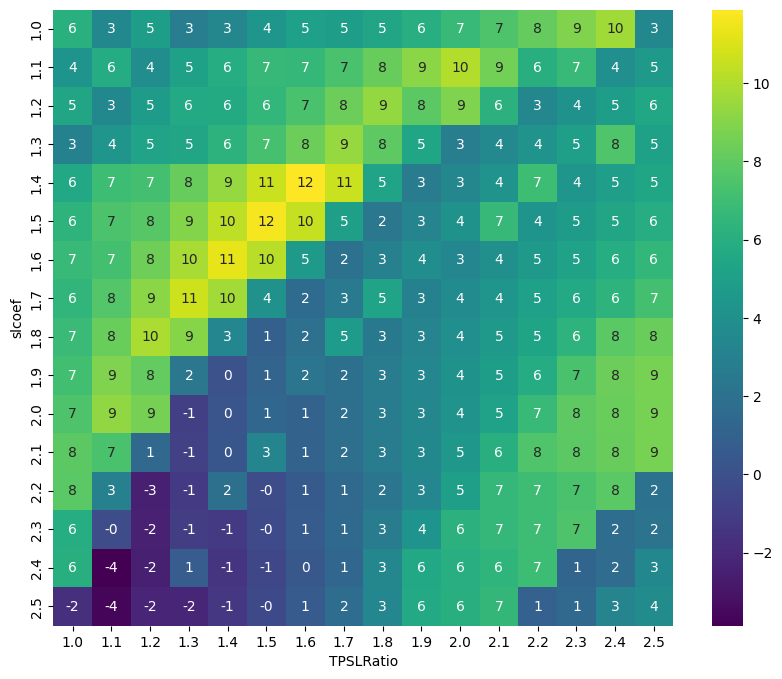

In [30]:
# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()